In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Graduate Student Instructor's (GSI's) Defense ##

In [3]:
# Midterm scores of students in each section
scores = pd.read_csv('scores_by_section.csv')
scores

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


In [4]:
# Number of students in each section
scores.groupby('Section').count()

,Midterm
Section,
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30


In [5]:
# Average grade for each section
scores.groupby('Section').mean()

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


In [8]:
# Randomly select 27 students (number of students in section 3 is 27) from all students
random_sample = scores.sample(27, replace = False)
random_sample

,Section,Midterm
96,9,17
248,12,13
45,5,23
255,12,12
78,6,11
310,6,17
244,3,10
304,8,18
8,5,8
166,7,11


In [9]:
#... And calculate the average
np.average(random_sample['Midterm'])

15.777777777777779

In [12]:
random_sample = scores.sample(27, replace = False)
np.average(random_sample['Midterm'])

16.77777777777778

In [13]:
# Repeat the random selection of 27 students for 50000 times and calculate and store the average score (test statistic) for each
averages = np.array([])

for i in np.arange(50000):
    random_sample = scores.sample(27, replace = False)
    new_average = np.average(random_sample['Midterm'])
    averages = np.append(averages, new_average)    

In [15]:
# observed average (observed test statistic) in Section 3 was 13.6667 
observed_average = scores[scores['Section'] == 3]['Midterm'].mean()
observed_average

13.666666666666666

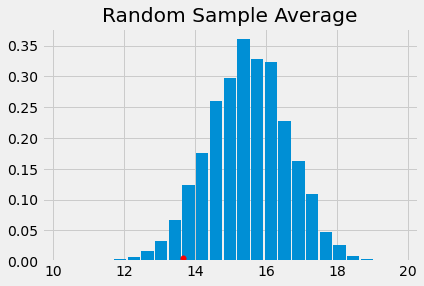

In [16]:
# Draw the empirical distribution of averages (test statistic)
# Don't worry about how the red dot was drawn. It shows the observed test statistic
pd.DataFrame({'Random Sample Average': averages}).hist(bins = 25, density=True, rwidth=0.90, zorder=1)
plt.scatter(observed_average, 0.005, color = 'red', s=30, zorder=2);

In [17]:
# P-value (observed significance level): Probability of getting the observed test statistic (average of Section 3) or lower. 
# If p-value is less than the threshold of 0.05, reject null hypothesis and accept the alternative. Otherwise, we accept the null hypothesis 
sum(averages <= observed_average) / 50000

0.05696

In [15]:
# Probability of getting 13.6 or lower is roughly %5. Statistical significance cut-off point
sum(averages <= 13.6) / 50000

0.05092

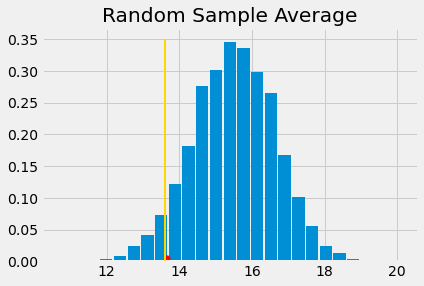

In [16]:
pd.DataFrame({'Random Sample Average': averages}).hist(bins = 25, density=True, rwidth=0.90, zorder=1)
plt.scatter(observed_average, 0.005, color = 'red', s=30, zorder=2);
plt.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2, zorder=3);